### 初始

对于高斯函数$f(x)$:

$$
f(x) = \frac{1}{\sqrt{2} \pi a} e^{- \frac{(x-x_0)^2}{2a}}
$$

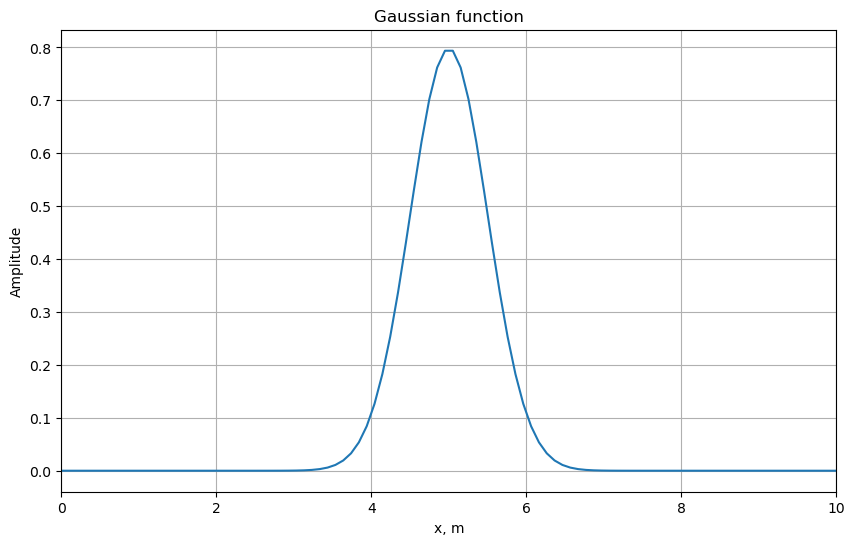

In [3]:
# Import Libraries
import numpy as np
from math import *
import matplotlib.pyplot as plt

# Initialization 
xmax=10.0       # physical domain (m)
nx=100          # number of space samples
a=.25           # exponent of Gaussian function    
dx=xmax/(nx-1)  # Grid spacing dx (m)
x0 = xmax/2     # Center of Gaussian function x0 (m)

x=np.linspace(0,xmax,nx)   # defining space variable

# Initialization of Gaussian function           
f=(1./sqrt(2*pi*a))*np.exp(-(((x-x0)**2)/(2*a)))

# Plotting of gaussian
plt.figure(figsize=(10,6))
plt.plot(x, f)
plt.title('Gaussian function')
plt.xlabel('x, m')
plt.ylabel('Amplitude')
plt.xlim((0, xmax))
plt.grid()
plt.show()

### 二阶导

1. 三点有限差分算子计算二阶导数

$$
f_{num}''(x) = \frac{f(x+dx) - 2f(x) + f(x-dx)}{dx^2}
$$

2. 解析解

$$
f''(x)=\frac{1}{\sqrt{2\pi a}}(\frac{(x-x_0)^2}{a^2}-\frac{1}{a})e^{-\frac{(x-x_0)^2}{2a}}
$$

3. 五点有限差分算子计算二阶导数
$$
f''(x)=\frac{-\frac{1}{12}f(x-2dx)+\frac{4}{3}f(x-dx)-\frac{5}{2}f(x)+\frac{4}{3}f(x+dx)-\frac{1}{12}f(x+2dx)}{dx^2}
$$

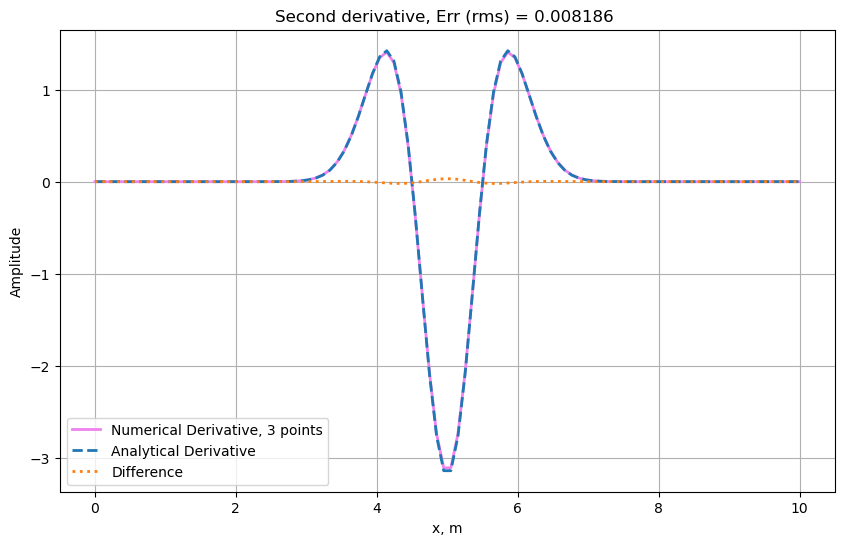

In [4]:
# Second derivative with three-point operator

# Initiation of numerical and analytical derivatives 
nder3=np.zeros(nx)          # numerical derivative
ader=np.zeros(nx)          # analytical derivative

# Numerical second derivative of the given function 
for i in range (1, nx-1):
    nder3[i]=(f[i+1] - 2*f[i] + f[i-1])/(dx**2)

# Analytical second derivative of the Gaissian function
ader=1./sqrt(2*pi*a)*((x-x0)**2/a**2 -1/a)*np.exp(-1/(2*a)*(x-x0)**2)
# Exclude boundaries
ader[0]=0.
ader[nx-1]=0.

# Calculate rms error of numerical derivative
rms = np.sqrt(np.mean((nder3-ader)**2))

# Plotting 
plt.figure(figsize=(10,6))
plt.plot (x, nder3,label="Numerical Derivative, 3 points", lw=2, color="violet")
plt.plot (x, ader, label="Analytical Derivative", lw=2, ls="--")
plt.plot (x, nder3-ader, label="Difference", lw=2, ls=":")
plt.title("Second derivative, Err (rms) = %.6f " % (rms) )
plt.xlabel('x, m')
plt.ylabel('Amplitude')
plt.legend(loc='lower left')
plt.grid()
plt.show()

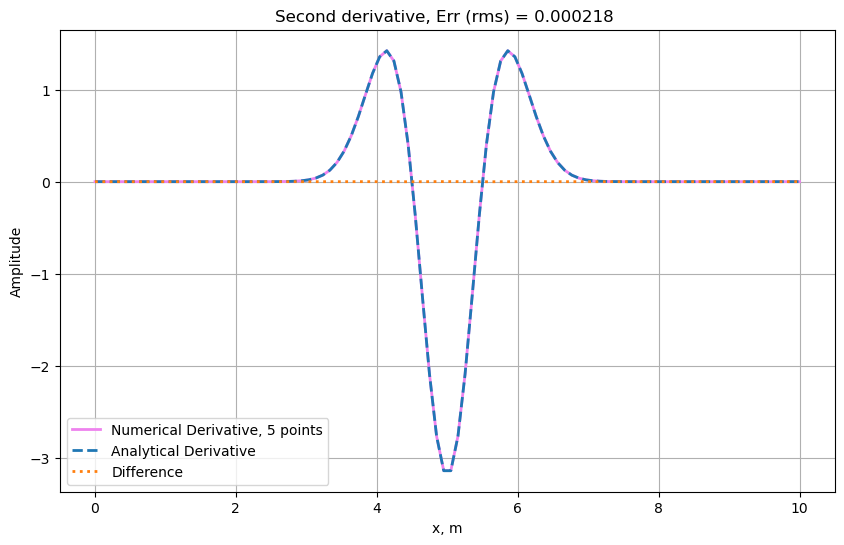

In [5]:
# First derivative with four points

# Initialisation of derivative
nder5=np.zeros(nx) 

# Calculation of 2nd derivative  
for i in range (2, nx-2):
    nder5[i] = (-1./12 * f[i - 2] + 4./3  * f[i - 1] - 5./2 * f[i] \
                       +4./3  * f[i + 1] - 1./12  * f[i + 2]) / dx ** 2
    
# Exclude boundaries
ader[1]=0.
ader[nx-2]=0.
    
# Calculate rms error of numerical derivative
rms=rms*0
rms = np.sqrt(np.mean((nder5-ader)**2))

# Plotting 
plt.figure(figsize=(10,6))
plt.plot (x, nder5,label="Numerical Derivative, 5 points", lw=2, color="violet")
plt.plot (x, ader, label="Analytical Derivative", lw=2, ls="--")
plt.plot (x, nder5-ader, label="Difference", lw=2, ls=":")
plt.title("Second derivative, Err (rms) = %.6f " % (rms) )
plt.xlabel('x, m')
plt.ylabel('Amplitude')
plt.legend(loc='lower left')
plt.grid()
plt.show()

结论：算子越多结果准确度越高